In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
import sklearn
from random import random
from sklearn.model_selection import cross_validate
import matplotlib
from waveform_methods import binning
import pandas as pd

from scipy.stats import norm
import pickle
from statistics import mode
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import scale

In [2]:
file = uproot.open('/home/andy/12360.root')
file2 = uproot.open('/home/andy/12362.root')
file3 = uproot.open('/home/andy/12630.root')
file4 = uproot.open('/home/andy/12631.root')

In [3]:
print(file['Stoch_Reco'].keys())

[b'Run', b'Event', b'SubEvent', b'SubEventStream', b'SubEventStream_String', b'exists', b'eloss_1000', b'eloss_1500', b'eloss_1600', b'eloss_1700', b'eloss_1800', b'eloss_1900', b'eloss_2000', b'eloss_2100', b'eloss_2200', b'eloss_2300', b'eloss_2400', b'eloss_3000', b'a_estim', b'a_estim_err', b'e0_estim', b'e0_estim_err', b'stoch_energy', b'rel_stoch_energy', b'total_stoch_energy', b'total_rel_stoch_energy', b'highest_stoch_energy', b'highest_rel_stoch_energy', b'chi2', b'chi2_red', b'stoch_depth', b'n_he_stoch', b'fit_status', b'fit_status_String']


In [4]:
Eloss_keys = file['Stoch_Reco'].keys()[6:18]
for i in range(len(Eloss_keys)):
    if i == 0:
        Eloss1 = file['Stoch_Reco'][Eloss_keys[i]].array()
    else:
        Eloss1 += file['Stoch_Reco'][Eloss_keys[i]].array()
Eloss1 = Eloss1/len(Eloss_keys)

Eloss_keys = file2['Stoch_Reco'].keys()[6:18]
for i in range(len(Eloss_keys)):
    if i == 0:
        Eloss2 = file2['Stoch_Reco'][Eloss_keys[i]].array()
    else:
        Eloss2 += file2['Stoch_Reco'][Eloss_keys[i]].array()
Eloss2 = Eloss2/len(Eloss_keys)

Eloss_keys = file3['Stoch_Reco'].keys()[6:18]
for i in range(len(Eloss_keys)):
    if i == 0:
        Eloss3 = file3['Stoch_Reco'][Eloss_keys[i]].array()
    else:
        Eloss3 += file3['Stoch_Reco'][Eloss_keys[i]].array()
Eloss3 = Eloss3/len(Eloss_keys)

Eloss_keys = file4['Stoch_Reco'].keys()[6:18]
for i in range(len(Eloss_keys)):
    if i == 0:
        Eloss4 = file4['Stoch_Reco'][Eloss_keys[i]].array()
    else:
        Eloss4 += file4['Stoch_Reco'][Eloss_keys[i]].array()
Eloss4 = Eloss4/len(Eloss_keys)

Eloss = np.append(np.append(np.append(Eloss1,Eloss2),Eloss3),Eloss4)

In [5]:
cut = []
for i in file['IT73AnalysisInIceQualityCuts'].keys()[6:11]:
    cut.append(file['IT73AnalysisInIceQualityCuts'][i].array())
cut = list(zip(cut))
for i in range(len(cut)):
    if i == 0:
        final_cut = cut[i][0]
    else:
        final_cut = [j and k for j,k in zip(final_cut,cut[i][0])]
        
cut = []
for i in file2['IT73AnalysisInIceQualityCuts'].keys()[6:11]:
    cut.append(file2['IT73AnalysisInIceQualityCuts'][i].array())
cut2 = list(zip(cut))
for i in range(len(cut2)):
    if i == 0:
        final_cut2 = cut2[i][0]
    else:
        final_cut2 = [j and k for j,k in zip(final_cut2,cut2[i][0])]
        
cut = []
for i in file3['IT73AnalysisInIceQualityCuts'].keys()[6:11]:
    cut.append(file3['IT73AnalysisInIceQualityCuts'][i].array())
cut3 = list(zip(cut))
for i in range(len(cut3)):
    if i == 0:
        final_cut3 = cut3[i][0]
    else:
        final_cut3 = [j and k for j,k in zip(final_cut3,cut3[i][0])]
        
cut = []
for i in file4['IT73AnalysisInIceQualityCuts'].keys()[6:11]:
    cut.append(file4['IT73AnalysisInIceQualityCuts'][i].array())
cut4 = list(zip(cut))
for i in range(len(cut4)):
    if i == 0:
        final_cut4 = cut4[i][0]
    else:
        final_cut4 = [j and k for j,k in zip(final_cut4,cut4[i][0])]
        
in_ice_cuts = np.append(np.append(np.append(final_cut,final_cut2),final_cut3),final_cut4)

In [6]:
Xmax1 = file['MCPrimaryInfo']['ghMaxDepth'].array()
valueDepth = file['MCPrimaryInfo']['longNumCharged'].array()
Depth1 = file['MCPrimaryInfo']['longDepth'].array()
chi2_1 = file['CurvatureOnlyParams']['chi2_time'].array()
red1 = file['MCPrimaryInfo']['ghRedChiSqr'].array()
mass1 = [1 for i in range(len(red1))]
        
Xmax2 = file2['MCPrimaryInfo']['ghMaxDepth'].array()
valueDepth = file2['MCPrimaryInfo']['longNumCharged'].array()
Depth2 = file2['MCPrimaryInfo']['longDepth'].array()
chi2_2 = file2['CurvatureOnlyParams']['chi2_time'].array()
red2 = file2['MCPrimaryInfo']['ghRedChiSqr'].array()
mass2 = [4 for i in range(len(red2))]

Xmax3 = file3['MCPrimaryInfo']['ghMaxDepth'].array()
valueDepth = file3['MCPrimaryInfo']['longNumCharged'].array()
Depth3 = file3['MCPrimaryInfo']['longDepth'].array()
chi2_3 = file3['CurvatureOnlyParams']['chi2_time'].array()
red3 = file3['MCPrimaryInfo']['ghRedChiSqr'].array()
mass3 = [2 for i in range(len(red3))]

Xmax4 = file4['MCPrimaryInfo']['ghMaxDepth'].array()
valueDepth = file4['MCPrimaryInfo']['longNumCharged'].array()
Depth4 = file4['MCPrimaryInfo']['longDepth'].array()
chi2_4 = file4['CurvatureOnlyParams']['chi2_time'].array()
red4 = file4['MCPrimaryInfo']['ghRedChiSqr'].array()
mass4 = [3 for i in range(len(red4))]


In [7]:
S125_1 = file['LaputopParams']['s125'].array()
S125_2 = file2['LaputopParams']['s125'].array()
S125_3 = file3['LaputopParams']['s125'].array()
S125_4 = file4['LaputopParams']['s125'].array()

A1 = file['CurvatureOnlyParams']['A'].array()
A2 = file2['CurvatureOnlyParams']['A'].array()
A3 = file3['CurvatureOnlyParams']['A'].array()
A4 = file4['CurvatureOnlyParams']['A'].array()

D1 = file['CurvatureOnlyParams']['D'].array()
D2 = file2['CurvatureOnlyParams']['D'].array()
D3 = file3['CurvatureOnlyParams']['D'].array()
D4 = file4['CurvatureOnlyParams']['D'].array()

N1 = file['CurvatureOnlyParams']['N'].array()
N2 = file2['CurvatureOnlyParams']['N'].array()
N3 = file3['CurvatureOnlyParams']['N'].array()
N4 = file4['CurvatureOnlyParams']['N'].array()

beta1 = file['LaputopParams']['beta'].array()
beta2 = file2['LaputopParams']['beta'].array()
beta3 = file3['LaputopParams']['beta'].array()
beta4 = file4['LaputopParams']['beta'].array()

zenith1 = file['Laputop']['zenith'].array()
zenith2 = file2['Laputop']['zenith'].array()
zenith3 = file3['Laputop']['zenith'].array()
zenith4 = file4['Laputop']['zenith'].array()

energy1 = file['MCPrimary']['energy'].array()
energy2 = file2['MCPrimary']['energy'].array()
energy3 = file3['MCPrimary']['energy'].array()
energy4 = file4['MCPrimary']['energy'].array()

stoch1_1 = file['Stoch_Reco']['n_he_stoch'].array()
stoch1_2 = file2['Stoch_Reco']['n_he_stoch'].array()
stoch1_3 = file3['Stoch_Reco']['n_he_stoch'].array()
stoch1_4 = file4['Stoch_Reco']['n_he_stoch'].array()

stoch2_1 = file['Stoch_Reco2']['n_he_stoch'].array()
stoch2_2 = file2['Stoch_Reco2']['n_he_stoch'].array()
stoch2_3 = file3['Stoch_Reco2']['n_he_stoch'].array()
stoch2_4 = file4['Stoch_Reco2']['n_he_stoch'].array()

slc_charge1 = file['LaputopSLCPE']['charge'].array()
slc_charge2 = file2['LaputopSLCPE']['charge'].array()
slc_charge3 = file3['LaputopSLCPE']['charge'].array()
slc_charge4 = file4['LaputopSLCPE']['charge'].array()

slc_charge1 = [np.sum(i[np.isnan(i)==False]) for i in slc_charge1]
slc_charge2 = [np.sum(i[np.isnan(i)==False]) for i in slc_charge2]
slc_charge3 = [np.sum(i[np.isnan(i)==False]) for i in slc_charge3]
slc_charge4 = [np.sum(i[np.isnan(i)==False]) for i in slc_charge4]

hlc_charge1 = file['LaputopHLCPE']['charge'].array()
hlc_charge2 = file2['LaputopHLCPE']['charge'].array()
hlc_charge3 = file3['LaputopHLCPE']['charge'].array()
hlc_charge4 = file4['LaputopHLCPE']['charge'].array()

hlc_charge1 = [np.sum(i[np.isnan(i) ==False]) for i in hlc_charge1]
hlc_charge2 = [np.sum(i[np.isnan(i)==False]) for i in hlc_charge2]
hlc_charge3 = [np.sum(i[np.isnan(i) ==False]) for i in hlc_charge3]
hlc_charge4 = [np.sum(i[np.isnan(i)==False]) for i in hlc_charge4]

Qtot1 = [i+j for i,j in zip(slc_charge1,hlc_charge1)]
Qtot2 = [i+j for i,j in zip(slc_charge2,hlc_charge2)]
Qtot3 = [i+j for i,j in zip(slc_charge3,hlc_charge3)]
Qtot4 = [i+j for i,j in zip(slc_charge4,hlc_charge4)]

In [8]:
A = np.append(np.append(np.append(A1,A2),A3),A4)
D = np.append(np.append(np.append(D1,D2),D3),D4)
N = np.append(np.append(np.append(N1,N2),N3),N4)
S125 = np.log10(np.append(np.append(np.append(S125_1,S125_2),S125_3),S125_4))
beta = np.log10(np.append(np.append(np.append(beta1,beta2),beta3),beta4))
chi2 = np.append(np.append(np.append(chi2_1,chi2_2),chi2_3),chi2_4)
red = np.append(np.append(np.append(red1,red2),red3),red4)
zenith = np.cos(np.append(np.append(np.append(zenith1,zenith2),zenith3),zenith4))
Xmax = np.append(np.append(np.append(Xmax1,Xmax2),Xmax3),Xmax4)
red = np.append(np.append(np.append(red1,red2),red3),red4)
mass = np.append(np.append(np.append(mass1,mass2),mass3),mass4)
slc_charge = np.append(np.append(np.append(slc_charge1,slc_charge2),slc_charge3),slc_charge4)
hlc_charge = np.append(np.append(np.append(hlc_charge1,hlc_charge2),hlc_charge3),hlc_charge4)
qtot =np.append(np.append( np.append(Qtot1,Qtot2),Qtot3),Qtot4)
stoch1 = np.append(np.append(np.append(stoch1_1,stoch1_2),stoch1_3),stoch1_4)
stoch2 = np.append(np.append(np.append(stoch2_1,stoch2_2),stoch2_3),stoch2_4)
for i in range(len(stoch1)):
    if not in_ice_cuts[i]:
        stoch1[i] = 0
        stoch2[i] = 0

energy_loss = Eloss
for i in range(len(energy_loss)):
    if ((energy_loss[i] != 0 and in_ice_cuts[i]) and np.isfinite(energy_loss[i])) and not np.isnan(energy_loss[i]):
        energy_loss[i] = np.log10(abs(energy_loss[i]))
    else:
        energy_loss[i] = 0
        
energy = np.log10(np.append(np.append(np.append(energy1,energy2),energy3),energy4))

In [9]:
values = [mass[in_ice_cuts==False],
            energy_loss[in_ice_cuts==False],
            stoch1[in_ice_cuts==False],
            stoch2[in_ice_cuts==False],
            A[in_ice_cuts==False],
            D[in_ice_cuts==False],
            N[in_ice_cuts==False],
            S125[in_ice_cuts==False],
            beta[in_ice_cuts==False],
            zenith[in_ice_cuts==False],
            chi2[in_ice_cuts==False],
            slc_charge[in_ice_cuts==False],
            hlc_charge[in_ice_cuts==False],
            qtot[in_ice_cuts==False]
            ]

print(np.corrcoef(values))

[[ 1.                 nan         nan         nan -0.14380063 -0.09513678
   0.09118868  0.02996411 -0.15106193  0.00446419         nan  0.21074023
  -0.01170223 -0.01015536]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan]
 [-0.14380063         nan         nan         nan  1.          0.3679269
  -0.07786714 -0.20433183  0.20146887  0.33351935         nan -0.3535373
  -0.12111291 -0.12355531]
 [-0.09513678         nan         nan         nan  0.3679269   1.
  -0.01436456 -0.55052398  0.04491631 -0.00978005         nan

/home/andy/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/home/andy/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



In [10]:
import random
from sklearn.model_selection import train_test_split

#model coinc:slc_charge,A,N,beta,energy_loss,stoch1,zenith
#model not coinc:slc_charge,beta,A,zenith
check = [i and j for i,j in zip(in_ice_cuts,np.isfinite(chi2))]

input_variable2_old = np.array(list(zip(slc_charge,A,energy_loss,S125,zenith)))[check]
output_new_old = mass[check]
energy_value = energy[check]

index = range(len(energy_value))

output,validation,output_mass,validation_mass = train_test_split(index,output_new_old,test_size=0.1,random_state=42)
        
validation_x = input_variable2_old[validation]
validation_y = output_new_old[validation]
validation_energy = energy_value[validation]
input_variable = np.array(input_variable2_old)[output]
output_new = np.array(output_new_old)[output]/4
energy_value1 = energy_value[output]
weights = np.array((qtot**0.5)[check][output])
index = np.array(range(len(weights)))

In [11]:
from sklearn.preprocessing import minmax_scale
import keras
from keras import initializers,regularizers
from keras.layers import Dense, Dropout, Flatten, Input, Concatenate, LeakyReLU
from keras.models import Model, load_model
import keras.backend as K
from tensorflow.python.framework import ops
from tensorflow.python.ops import gen_math_ops as math_ops

Using TensorFlow backend.


In [12]:
train_index,test_index,train_labels,test_labels = train_test_split(index,output_new,test_size=0.2,random_state=42)

In [13]:
best_model = keras.callbacks.ModelCheckpoint('Mass_model_all_best_coinc.h5',
                                             monitor='val_loss',
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='auto')

In [14]:
input_layer = Input(shape=(5,))

model1 = Dense(7,activation='sigmoid')(input_layer)

#model1 = LeakyReLU()(model1)

model1 = Dropout(rate=0.1)(model1)

model2 = Dense(4,activation='sigmoid')(model1)

#model2 = LeakyReLU()(model2)

predictions = Dense(1,activation='sigmoid')(model2)

model = Model(inputs=input_layer,outputs=predictions)

opt = keras.optimizers.RMSprop(decay=1e-5)
#opt= keras.optimizers.Adam(decay=1e-5,lr=1e-4)                                                               

model.compile(optimizer=opt , loss = 'mse')

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 42        
_________________________________________________________________
dropout_1 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(input_variable[train_index],train_labels,
                    batch_size=30,
                    epochs=100,
                    validation_data = (input_variable[test_index],test_labels),
                    callbacks=[best_model,callback],
                    #class_weight=weights[train_index]
                   )

model.save('Mass_model_all_coinc.h5')

Train on 62136 samples, validate on 15535 samples
Epoch 1/100
62136/62136 [==============================] - 2s 30us/step - loss: 0.0746 - val_loss: 0.0710
Epoch 2/100
62136/62136 [==============================] - 2s 27us/step - loss: 0.0676 - val_loss: 0.0611
Epoch 3/100
62136/62136 [==============================] - 2s 29us/step - loss: 0.0610 - val_loss: 0.0554
Epoch 4/100
62136/62136 [==============================] - 2s 28us/step - loss: 0.0581 - val_loss: 0.0538
Epoch 5/100
62136/62136 [==============================] - 2s 31us/step - loss: 0.0567 - val_loss: 0.0530
Epoch 6/100
62136/62136 [==============================] - 2s 28us/step - loss: 0.0557 - val_loss: 0.0526
Epoch 7/100
62136/62136 [==============================] - 2s 27us/step - loss: 0.0555 - val_loss: 0.0523
Epoch 8/100
62136/62136 [==============================] - 2s 29us/step - loss: 0.0550 - val_loss: 0.0521
Epoch 9/100
62136/62136 [==============================] - 2s 28us/step - loss: 0.0543 - val_loss: 0.0

In [31]:
#model_name = 'Mass_model_all_best_coinc.h5'
model_name = 'Mass_model_best_coinc2.h5'
new_model = load_model(model_name)
predict = new_model.predict(validation_x)
predict = predict

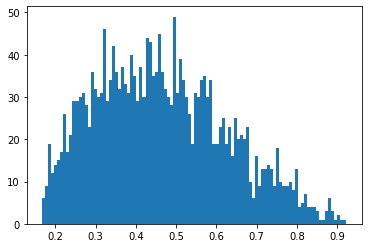

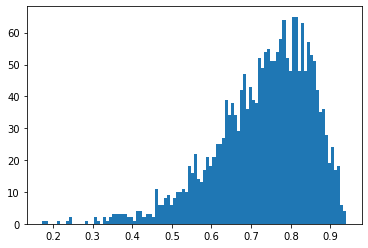

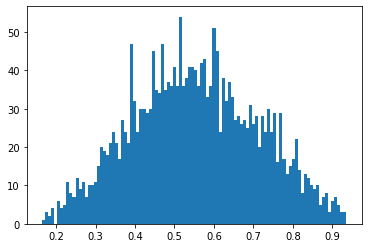

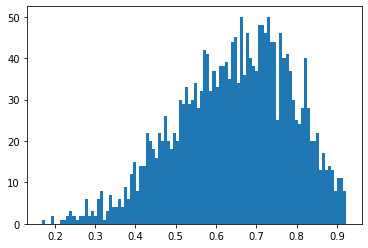

In [32]:
validation_y1 = validation_y

plt.hist(predict[validation_y1==1],bins=100)
plt.show()
plt.hist(predict[validation_y1==4],bins=100)
plt.show()
plt.hist(predict[validation_y1==2],bins=100)
plt.show()
plt.hist(predict[validation_y1==3],bins=100)
plt.show()

In [28]:
index = range(len(validation_energy))
array_split = np.array_split(sorted(list(zip(index,validation_energy)),key=lambda x:x[1]),20)

In [29]:
model = load_model(model_name)
x = []
y_proton = []
y_iron = []
y_helium = []
y_oxygen = []
for i in array_split:
    index1 = []
    for k in list(zip(*i))[0]:
        index1.append(int(k))
    energy = validation_energy[index1]
    mass1 = validation_y1[index1]
    data = validation_x[index1]
    #prediction1 = prediction_model(data)
    prediction1 = model.predict(data)
    for j in range(len(prediction1)):
        if prediction1[j] < 1.5/4:
            prediction1[j] = 1
        elif (prediction1[j] >= 1.5/4 and prediction1[j] < 2.5/4):
            prediction1[j]= 2
        elif (prediction1[j] >= 2.5/4 and prediction1[j] < 3.5/4):
            prediction1[j] = 3
        else:
            prediction1[j] = 4

    cm = confusion_matrix(mass1,prediction1)
    x.append((max(energy)+min(energy))/2)
    y_proton.append(cm[0][0]/np.sum(cm[0]))
    y_iron.append(cm[3][3]/np.sum(cm[3]))
    y_helium.append(cm[1][1]/np.sum(cm[1]))
    y_oxygen.append(cm[2][2]/np.sum(cm[2]))

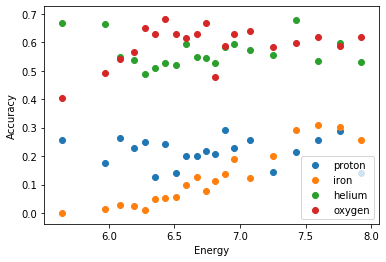

In [30]:
plt.scatter(x,y_proton,label='proton')
plt.scatter(x,y_iron,label='iron')
plt.scatter(x,y_helium,label='helium')
plt.scatter(x,y_oxygen,label='oxygen')
plt.xlabel('Energy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()